##### [< Forrige](9%20-%20webskraping%20med%20python.ipynb)     |     [Neste >](11%20-%20interaktive%20websider.ipynb#Interaktivt-kart)

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 10 - statsmodels </span>  

Statsmodels er den mest brukte pakken for å kjøre statistiske analyser i Python. I denne forelesningen skal vi kun se på den enkleste typen regresjon - Minste Kvadraters Metode (Ordinary Least Squares) - eller OLS som vi vanligvis kaller det. 

# Gapminder

For å bruke `statsmodels` må vi ha et datasett. Vi skal bruke et datasett fra [gapminder.com](https://www.gapminder.org/answers/how-does-income-relate-to-life-expectancy/). Datasettet viser sammenhengen mellom BNP og forventet levealder på en illustrerende måte. 

Vi begynner med å laste inn datasettet fra [https://titlon.uit.no/hht/data/gapminder.csv](https://titlon.uit.no/hht/data/gapminder.csv):

#### Eksempel 1:

In [1]:
import pandas as pd
g = pd.read_csv("https://titlon.uit.no/hht/data/gapminder.csv")#reading data
g

,Unnamed: 0,country,year,population,continent,life_exp,gdp_cap
0,11,Afghanistan,2007,31889923,Asia,43.828,974.580338
1,23,Albania,2007,3600523,Europe,76.423,5937.029526
2,35,Algeria,2007,33333216,Africa,72.301,6223.367465
3,47,Angola,2007,12420476,Africa,42.731,4797.231267
4,59,Argentina,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...,...,...
137,1655,Vietnam,2007,85262356,Asia,74.249,2441.576404
138,1667,West Bank and Gaza,2007,4018332,Asia,73.422,3025.349798
139,1679,"Yemen, Rep.",2007,22211743,Asia,62.698,2280.769906
140,1691,Zambia,2007,11746035,Africa,42.384,1271.211593


Vi plotter så forventet antall leveår mot produksjon (BNP) per innbyger, slik vi har lært i [3 -matplotlib](https://espensirnes.github.io/notebooks/html/3%20-%20matplotlib.html):

#### Eksempel 2:

In [4]:
print(type('year'))

<class 'str'>


In [5]:
print(g.dtypes,sep='')

Unnamed: 0      int64
country        object
year            int64
population      int64
continent      object
life_exp      float64
gdp_cap       float64
dtype: object


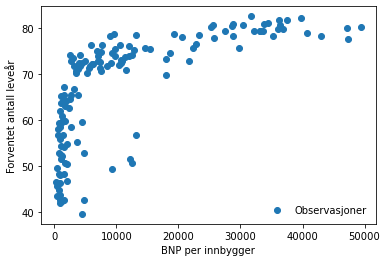

In [2]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Forventet antall leveår')
ax.set_xlabel('BNP per innbygger')

#plotting the function:
ax.scatter(g['gdp_cap'], g['life_exp'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

Grafisk ser det ut til at forventet levealder øker mye for lavt BNP per innbygger. Det tyder på at det er den prosentvise økningen i BNP som er avgjørende. Altså at en økning i inntekt fra for eksempel hunder kroner dagen til to hundre kroner, har en mye større effekt enn en økning fra kr 2 000 til kr 2 100. Ved å konvertere bnp til log blir den prosentvise økningen konstant langs x-aksen:

#### Eksempel 3:

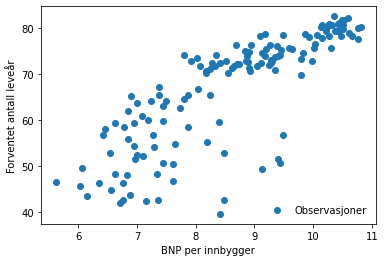

In [3]:
import numpy as np
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Forventet antall leveår')
ax.set_xlabel('BNP per innbygger')

#plotting the function:
ax.scatter(np.log(g['gdp_cap']), g['life_exp'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

# Regressjon

Vi ser at vi nå får en penere spredning, og det ser ut til å være en sammenheng. Vi skal nå forsøke å tegne en "regessjonslinje" blant prikkene som er slik at avstanden til prikkene er så liten som mulig, i gjennomsnitt. Det er denne metoden som kalles "Minste Kvadraters Metode" eller "Oridnary Least Squares" (OLS), og går ut på å finne den linjen som er slik at summert kvadratet av den vertikale avstanden til alle prikkene, minimeres. 

Vi skal ikke gå så nøye inn på matematikken her, men poenget er altså å finne en linje som passer så godt som mulig til dataene. 

La oss først sørge for at vi har dataene organisert riktig. Vi må først definere y-variablen (vertikal akse) og x-variablene (horisontal akse). Det er ikke sikkert at linjen vi skal tegne bør krysse akkurat i "origo", der x og y-aksene krysser hverandre. Det er tvert i mot lite sannsynlig. Vi må derfor ha med et konstantledd, som angir hvor på y-aksen linjen skal krysse. 

Vi legger til et konstantledd ved å definere en variabel `'intercept'` lik 1. Linjen vi skal forsøke å finne er gitt ved

$\alpha+\beta \cdot x$

Vi skal altså forsøke å finne $\alpha$ og $\beta$ som passer best til de observerte kombinasjonene av x og y. y er forventet antall leveår:

#### Eksempel 4:

In [4]:
y=g['life_exp']
pd.DataFrame(y)

,life_exp
0,43.828
1,76.423
2,72.301
3,42.731
4,75.320
...,...
137,74.249
138,73.422
139,62.698
140,42.384


... og x er BNP per capita og konstantleddet som alltid er 1:

#### Eksempel 5:

In [5]:
x=pd.DataFrame(np.log(g['gdp_cap']))
x['intercept']=1
x

,gdp_cap,intercept
0,6.882007,1
1,8.688964,1
2,8.736066,1
3,8.475794,1
4,9.455588,1
...,...,...
137,7.800399,1
138,8.014782,1
139,7.732268,1
140,7.147726,1


# Estimat
Vi kan nå estimere hvilke koefisienter $\alpha$ og $\beta$ som passer best til dataene. Da bruker vi `OLS` fra `statsmodels`og sette inn y og x: 

#### Eksempel 6:

In [6]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     265.2
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           4.12e-34
Time:                        07:39:49   Log-Likelihood:                -479.26
No. Observations:                 142   AIC:                             962.5
Df Residuals:                     140   BIC:                             968.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gdp_cap        7.2028      0.442     16.283      0.0

Over ser vi resultatet av regresjonen. Det vi bør legge spesielt merke til er kolonnen under `coef`, som viser estimatene. Vi ser at $\alpha=4.9496$ og $\beta=7.2028$. Disse tallene er lagret i res.params:

#### Eksempel 7:

In [7]:
res.params

gdp_cap      7.202802
intercept    4.949612
dtype: float64

Vi kan derfor bruke `res.params` til å plotte linjen $\alpha+\beta \cdot x$

#### Eksempel 8:

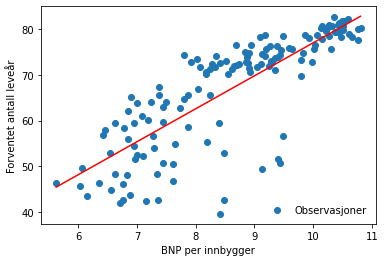

In [8]:
x=np.linspace(min(np.log(g['gdp_cap'])), max(np.log(g['gdp_cap'])), 100)

regression_line=res.params['intercept']+res.params['gdp_cap']*x

ax.plot(x, regression_line,color='red')
fig

Vi ser at regresjonslinjen passer svært godt til dataene. Siden vi har brukt OLS vet vi at dette er den linjen som har minst avstand i gjennomsnitt til alle punktene. "Avstand" måles som kvadrate av den vertikale differansen. Matematisk kan vi skrive det slik:

$y=\alpha+\beta \cdot x+\epsilon$

der $\alpha+\beta \cdot x$ er linjen og $\epsilon$ er den vertikale avstanden til linjen.

## Signifikans

Det viktigste i resulatet fra regressionen i Eksempel 6 er ikke nødvendigvis koefisientene, selv om de er nødvendige for å tegne en regresionslinje. Enda viktigere er det å vite om helningen like gjerne kunne vært null. I så fall kan vi ikke konkludere med at det er noen sammenheng med variablene. Hovedpoenget med å kjøre en regression er jo vanligvis å undersøke om det er en linær sammenheng. I eksemplet over ønsker vi for eksempel å vite om det er en sammenheng mellom BNP per innbygger og antall leveår. 

Når en linær sammenheng ikke kan skyldes tilfeldighet kaller vi sammenhengen for *signifikant*. 

På grunn av ren tilfeldighet er sjeldent helningen i en regresjon null. Vi får derfor ikke noe ut av å se på selve koefisienten om den er null eller ikke. I stedet må vi se på p-verdien. p-verdien angir sannsynligheten for at resultatet skyldes tilfeldighet. Når denne sannsynligheten er mindre enn én prosent, konkluderer vi vanligvis med at resultatet er signifikant. 

## Oppgave

Koden under generer et datasett som du kan analysere med `statsmodels`. Kjør en regresjon med dataene, og forsøk med ulike verdier for `beta`for å finne ut hvor liten den må være for at resultatet ikke er signifikant:

In [9]:
beta=1
N=100
x=5+np.random.rand(N)
data=pd.DataFrame({'y':-3+beta*x+np.random.rand(N), 'x':x})
data

,y,x
0,2.750476,5.289158
1,2.974016,5.191201
2,2.654553,5.130323
3,3.026748,5.223895
4,2.778415,5.727414
...,...,...
95,2.643294,5.133741
96,3.094564,5.609762
97,2.440469,5.262154
98,2.438425,5.231921


In [14]:
# Må lage denne:
y=data['y']
x=pd.DataFrame(data['x'])
x['intercept']=1
x

,x,intercept
0,5.289158,1
1,5.191201,1
2,5.130323,1
3,5.223895,1
4,5.727414,1
...,...,...
95,5.133741,1
96,5.609762,1
97,5.262154,1
98,5.231921,1


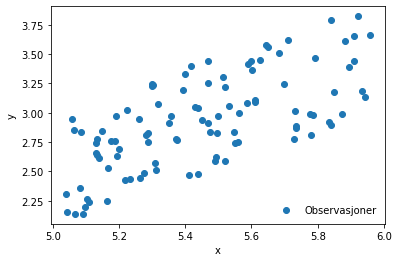

In [15]:
import numpy as np
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('y')
ax.set_xlabel('x')

#plotting the function:
ax.scatter(x['x'], y, label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

In [16]:
res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     86.08
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           4.46e-15
Time:                        08:23:15   Log-Likelihood:                -17.494
No. Observations:                 100   AIC:                             38.99
Df Residuals:                      98   BIC:                             44.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.0253      0.111      9.278      0.0

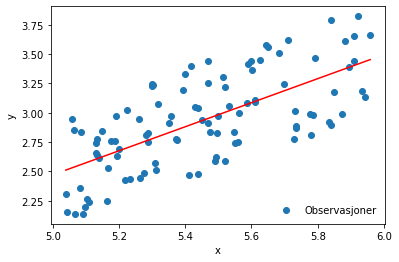

In [18]:
x_lin=np.linspace(min(x['x']), max(x['x']), 100)
regression_line=res.params['intercept']+res.params['x']*x_lin

ax.plot(x_lin, regression_line,color='red')
fig

##### [< Forrige](9%20-%20webskraping%20med%20python.ipynb)     |     [Neste >](11%20-%20interaktive%20websider.ipynb#Interaktivt-kart)